# ECE 450 - Homework #13

### Package Imports


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as sig
from control import margin, tf
import warnings
warnings.filterwarnings('ignore')


## Generic function to convolve any number of equations


In [9]:
def convolve_all(values):
    temp_conv = values[0]
    if len(values) > 1:
        for next_val in values[1:]:
            temp_conv = np.convolve(temp_conv, next_val)
    
    return temp_conv


## Generic function shift a given filter to a new center frequency


In [11]:
def shift_filter(num, den, new_center):
    new_num = np.pad(num, (len(den) - len(num), 0), 'constant')
    new_den = den

    for i in range(len(new_den)):
        new_num[i] *= (new_center ** i)
        new_den[i] *= (new_center ** i)
        
    return new_num, new_den


### Generic function to plot the responses of a system


In [2]:
# Color list for multiple lines on each subplot
colors = ["red", "blue", "green", "gray", "purple", "orange"]
step_size = 0.005

# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=[("Plot", )], num_rows=1, size=(18, 14), logx=False):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='lower right')
            if logx:
                plt.xscale("log")
    
    plt.show()


### Generic function to generate the $|H|$ and $\phi$ values of a $H(z)$ function


In [3]:
def z_plot(num, den, T):
    phi = np.arange(0.001, np.pi, T)
    angles = angles = [np.exp(complex(0, angle)) for angle in phi]
    
    # Loop through all angles, calculate that angles H(z)
    h_z = []
    for z in angles:
        num_sum, den_sum = 0, 0
        for z_pow, num_val in enumerate(num):
            num_sum += num_val * z ** (len(num) - z_pow)
        for z_pow, den_val in enumerate(den):
            den_sum += den_val * z ** (len(den) - z_pow)
        h_z.append(num_sum / den_sum)
    
    return np.multiply(180 / np.pi, phi), 20 * np.log10(h_z)

9.1.3, 9.2.1, 9.3.1

## Problem 9.1.3

2nd order monotonic monotonic band pass filter with a pass band between 500 and 550 $\frac{rad}{s}$. The sampling time is 0.1 milliseconds.

Start with $n=1$, a bandwidth $W=50$, and a center frequency of $\omega _c = 525$. 

$$H_{lp}=\frac{1}{s+1}$$

Scale up this low-pass filter:

$$G_0(s)=H_{lp}(\frac{s}{50})=\frac{50}{s+50}$$

Now, transform this to a bandpass filter:

$$G(s)=G_0(\frac{s^2+525^2}{s})=\frac{50s}{s^2+50s+275,625}$$

Now, to convert this function to a z-equivalent transfer function:

$$\alpha=\frac{50}{2}=25, \omega ^2=275625-(\frac{50}{2})^2=275000, K_2=50, K_1=\frac{-50*25}{\sqrt {275000}}=-2.38$$

$$H(s)=K_1\frac{\omega}{(s+\alpha)^2+\omega ^2}+K_2\frac{s+\alpha}{(s+\alpha)^2+\omega ^2}$$

$$H(s)=-2.38\frac{524.4}{(s+25)^2+275000}+50\frac{s+25}{(s+25)^2+275000}$$

$$H(t)=(-2.38e^{-25t}sin(25t)+50e^{-25t}cos(25t))\cdot u(t)$$

$$H(z)=-2.38T\frac{e^{-25T}sin(25T)z}{z^2-2e^{-25T}cos(25T)z+e^{-50T}}+50T\frac{z^2-e^{-25T}cos(25T)z}{z^2-2e^{-25T}cos(25T)z+e^{-50T}}$$

Resulting in the following Z-domain transfer function:

$$H(z)=\frac{z^20.005+z0.005}{z^2-z1.995+1}$$

## Problem 9.2.1

The below section of code gives my the $H(s)$ function for the third order butterworth filter:

In [18]:
scipy.signal.TransferFunction([50, 0], [1, 50, 275625], dt=0.1 * 10 ** -3)

TransferFunctionDiscrete(
array([50.,  0.]),
array([1.00000e+00, 5.00000e+01, 2.75625e+05]),
dt: 0.0001
)

In [14]:
n = 3

pole_list = []
for m in range(1, n + 1):
    phi = np.pi / 2 + np.pi / 2 * (2 * m - 1) / n
    pole_list.append(complex(np.cos(phi), np.sin(phi)))
    
num = [1]
den = convolve_all([[1, -pole] for pole in pole_list])
final_num, final_den = shift_filter(num, den, 10 ** 3)

print ("Num: ", num, "\nDen: ", np.real(den))

Num:  [1] 
Den:  [1.e+00 2.e+03 2.e+06 1.e+09]


$$H(s)=\frac{1}{s^3+s^22\cdot 10^3+s2\cdot 10^6+10^9}$$

Which can be converted to:

$$H(z)=\frac{1}{z^3+z^22\cdot 10^3+z2\cdot 10^6+10^9}$$

## Problem 9.3.1


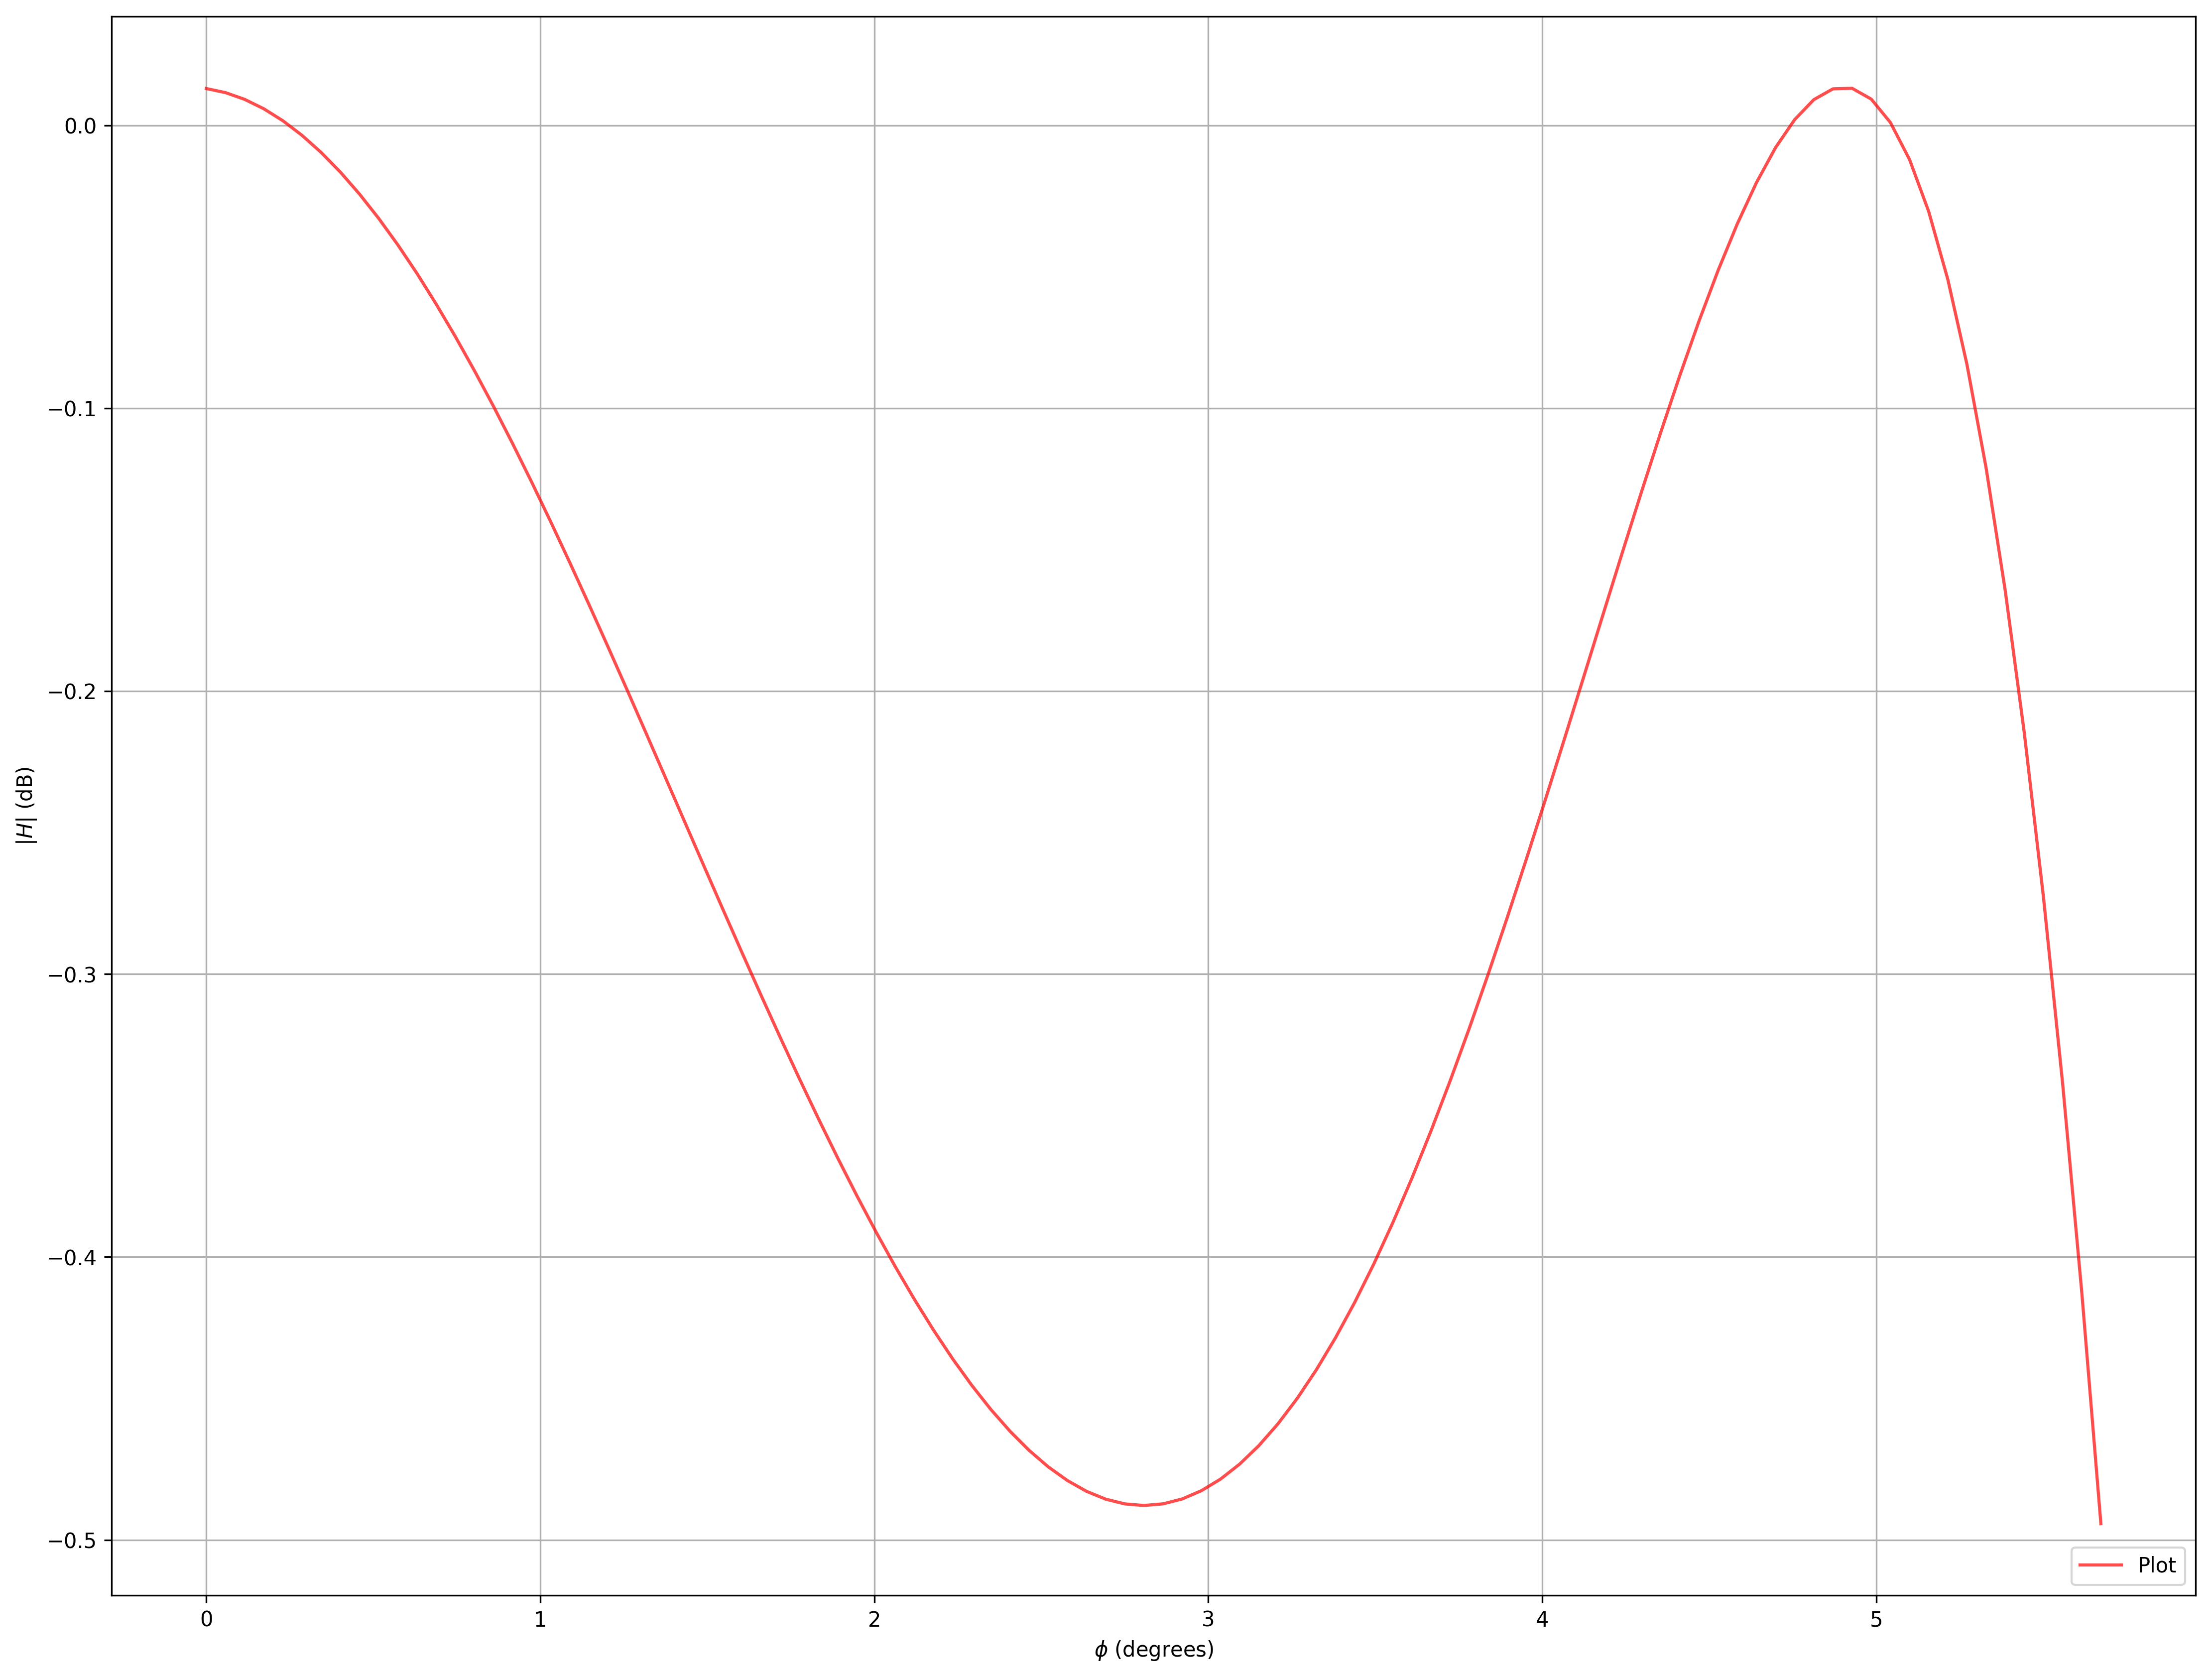

In [49]:
T = 0.1

phi = np.arange(0, 2 * np.pi, T / 100)
NN = len(phi)
H = []

for n in range(1, NN):
    z = np.exp(complex(0, phi[n]))
    s = (2 / T) * (z - 1) / (z + 1)
    H.append(0.716 / ((s + 0.626) * (s * s + 0.626 * s + 1.142)))
    
phi = np.multiply(180 / np.pi, phi[:-1])[:int(len(phi)/2)][:100]
H = np.multiply(20, np.log10(H[:len(phi)]))[:100]

create_plot([phi], [(H, )], ["$\phi$ (degrees)"], ["$|H|$ (dB)"])

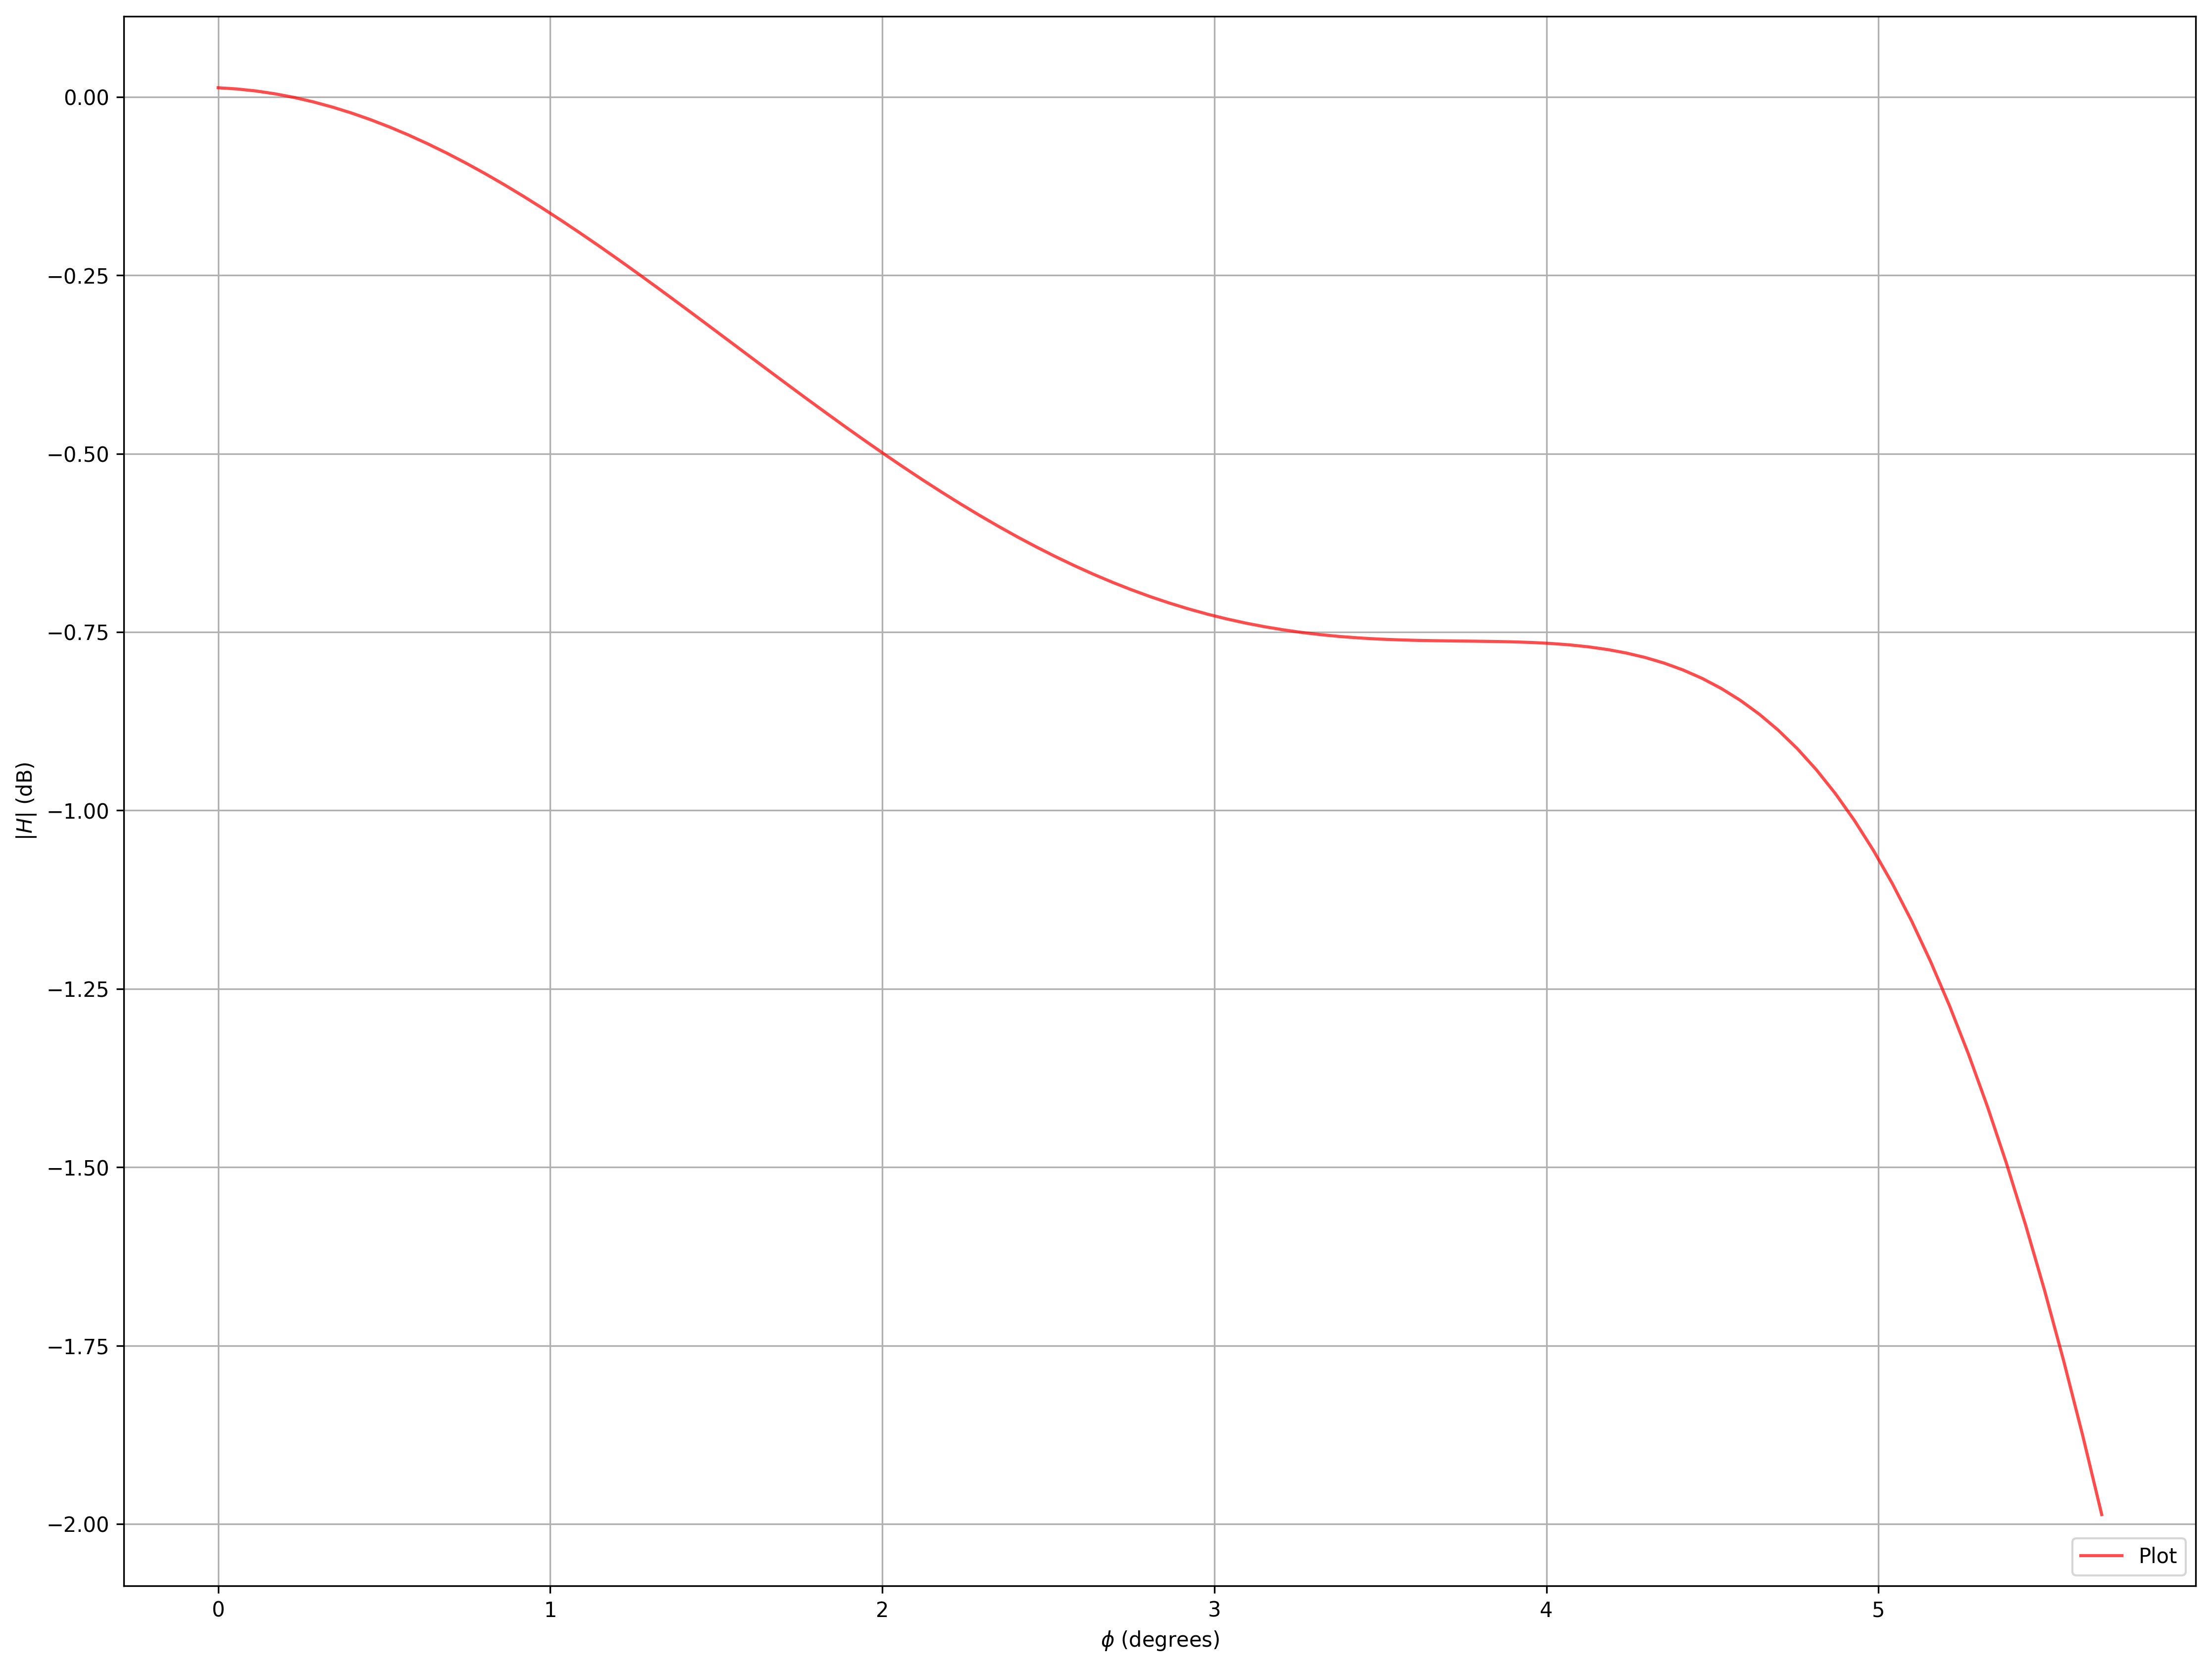

In [48]:
T = 0.1

phi = np.arange(0, 2 * np.pi, T / 100)
NN = len(phi)
H = []

for n in range(1, NN):
    z = np.exp(complex(0, phi[n]))
    s = (1 - 1 / z) / T
    H.append(0.716 / ((s + 0.626) * (s * s + 0.626 * s + 1.142)))
    
phi = np.multiply(180 / np.pi, phi[:-1])[:int(len(phi)/2)][:100]
H = np.multiply(20, np.log10(H[:len(phi)]))[:100]

create_plot([phi], [(H, )], ["$\phi$ (degrees)"], ["$|H|$ (dB)"])

As can be seen, the backward rectangular approximation does not meet the specification of the starting 3rd order Chevy-chase filter. The approximated $H(z)$ is drastically different.